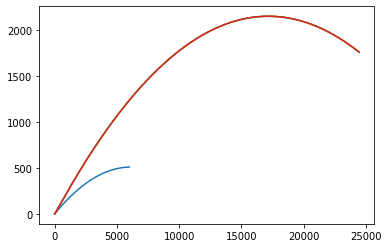

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as pp

MODEL_G = 9.81
MODEL_DT = 0.01
MODEL_DM = 3 # масса топлива, тратящегося за 1 секунду
MODEL_m = 3 #изначальная масса топлива в ракете
MODEL_M = 5 #масса ракеты
a = math.pi/12 

class Body:
    def __init__(self, x, y, vx, vy):

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        
    def advance(self):
        
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT


class Rocket(Body):
    def __init__(rocket, x, y):
        
        rocket.trajectory_x = []
        rocket.trajectory_y = []
        
        super().__init__(x, y, 9, 0 )
        rocket.x = x
        rocket.y = y
        rocket.u = 9
        rocket.m = 0
    
    def advance(rocket):
        
        rocket.trajectory_x.append(rocket.x)
        rocket.trajectory_y.append(rocket.y)
        while rocket.m < MODEL_m: # определяем условия для просчёта реактивного движения
            rocket.m += MODEL_DM*MODEL_DT
            rocket.x += rocket.vx * MODEL_DT
            rocket.y += rocket.vy * MODEL_DT
            rocket.vx +=  math.cos(a) * rocket.u * math.log1p(MODEL_M / (MODEL_M - rocket.m))
            rocket.vy += math.sin(a) * rocket.u * math.log1p(MODEL_M / (MODEL_M - rocket.m)) - (MODEL_G * MODEL_DT)
            
            break
        
        rocket.x += rocket.vx * MODEL_DT
        rocket.y += rocket.vy * MODEL_DT
        rocket.vy -= MODEL_G * MODEL_DT
            

b = Body(0,0,600,100) # большие значения для удобства сравнения
r = Rocket(0, 0)

bodies = [b, r]

for t in np.r_[0:10:MODEL_DT]:
    for b in bodies:
        b.advance()
        r.advance()
            
        
        
        


for r in bodies:
    pp.plot(r.trajectory_x, r.trajectory_y)
    pp.plot(b.trajectory_x, b.trajectory_y)
    